Vader: 
*   This uses a "bag of words" approach:
*   Stop words are removed
*   Each word is scored and combined to a total score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('vader_lexicon')

# Read in the data
df = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidDepressionRedditData.csv')
df = df.reset_index().rename(columns={'index': 'ID'})

print(df.shape)
df = df.head(500)
print(df.shape)

df.head()

(261, 9)
(261, 9)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:992)>


,ID,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,depression,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",I know how you feel. I feel sad and hopeless m...,6676,197,2019-07-14 07:53:40,cd0hjp
1,1,depression,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",[deleted],4420,125,2019-07-12 13:36:38,ccaxvm
2,2,depression,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,This would be called Persistent Depressive Dis...,4089,200,2019-10-31 09:36:19,dpl4bu
3,3,depression,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",That honestly sucks! I hate when parents do th...,4022,177,2019-10-07 15:35:16,del3c8
4,4,depression,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,"Yes, every day! It's the only thing exciting i...",3923,179,2019-03-26 05:40:19,b5lw5z


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [3]:
# Run the polarity score on the entire dataset
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    title = str(row['Title'])
    content = str(row['Content'])
    
    resTitle[i] = sia.polarity_scores(title)
    resContent[i] = sia.polarity_scores(content)

  0%|          | 0/261 [00:00<?, ?it/s]

In [4]:
vadersTitle = pd.DataFrame(resTitle).T
vadersTitle = vadersTitle.reset_index().rename(columns={'index': 'ID'})
vadersTitle = vadersTitle.merge(df, on='ID', how='left')
vadersTitle.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.509,0.491,0.000,-0.8519,depression,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",I know how you feel. I feel sad and hopeless m...,6676,197,2019-07-14 07:53:40,cd0hjp
1,1,0.065,0.886,0.048,-0.2144,depression,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",[deleted],4420,125,2019-07-12 13:36:38,ccaxvm
2,2,0.303,0.492,0.205,-0.2960,depression,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,This would be called Persistent Depressive Dis...,4089,200,2019-10-31 09:36:19,dpl4bu
3,3,0.206,0.794,0.000,-0.6908,depression,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",That honestly sucks! I hate when parents do th...,4022,177,2019-10-07 15:35:16,del3c8
4,4,0.137,0.621,0.242,0.4019,depression,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,"Yes, every day! It's the only thing exciting i...",3923,179,2019-03-26 05:40:19,b5lw5z


In [5]:
vadersContent = pd.DataFrame(resContent).T
vadersContent = vadersContent.reset_index().rename(columns={'index': 'ID'})
vadersContent = vadersContent.merge(df, on='ID', how='left')
vadersContent.head()

,ID,neg,neu,pos,compound,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.185,0.656,0.158,-0.5473,depression,Shout out to the particular hell that is funct...,"This is me. Don’t get me wrong, it’s better th...",I know how you feel. I feel sad and hopeless m...,6676,197,2019-07-14 07:53:40,cd0hjp
1,1,0.000,1.000,0.000,0.0000,depression,If 10 years ago someone told me that in 10 yea...,"But here I am, 24 years old man and doing exac...",[deleted],4420,125,2019-07-12 13:36:38,ccaxvm
2,2,0.172,0.684,0.144,-0.8880,depression,High-functioning depression: I feel like I'm l...,I read a lot of posts on here of people strugg...,This would be called Persistent Depressive Dis...,4089,200,2019-10-31 09:36:19,dpl4bu
3,3,0.200,0.452,0.348,0.3167,depression,I cried in front of my family today. They ende...,"Thank you, that really helps. Now I feel ten t...",That honestly sucks! I hate when parents do th...,4022,177,2019-10-07 15:35:16,del3c8
4,4,0.120,0.735,0.145,0.8100,depression,Does anyone else stay up super late to avoid t...,I don’t know if that makes sense. What I mean ...,"Yes, every day! It's the only thing exciting i...",3923,179,2019-03-26 05:40:19,b5lw5z


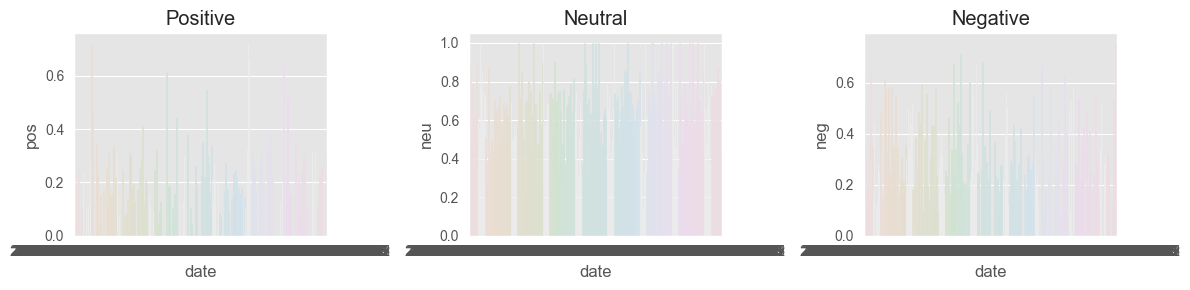

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersTitle, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersTitle, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersTitle, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

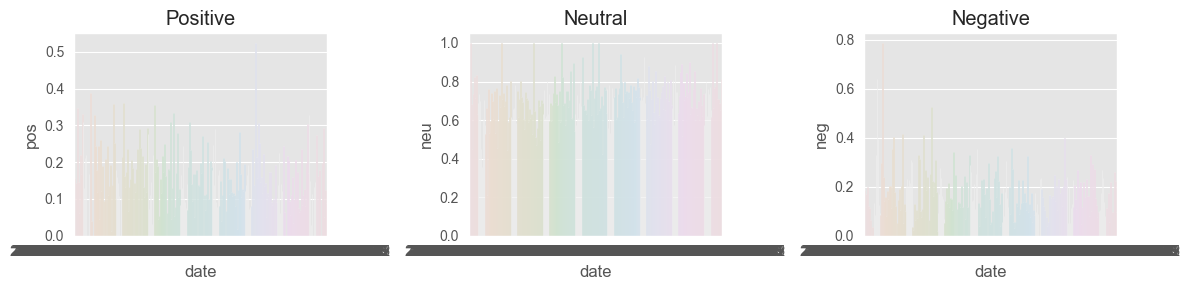

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vadersContent, x='date', y='pos', ax=axs[0])
sns.barplot(data=vadersContent, x='date', y='neu', ax=axs[1])
sns.barplot(data=vadersContent, x='date', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Huggingface Roberta Transformers: https://huggingface.co/docs/transformers/model_doc/roberta

Roberta Pretrained Model:
*   A model trained from a large corpus of data.
*   Transformer model accounts for the words but also the context related to other words.



In [8]:
!pip install transformers

In [9]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [10]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [11]:
# Run for Roberta Model
robertaTitle = {}
robertaContent = {}
resTitle = {}
resContent = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        title = str(row['Title'])

        vader_title_result = sia.polarity_scores(title)
        vader_title_result_rename = {}

        for key, value in vader_title_result.items():
            vader_title_result_rename[f"vader_{key}"] = value
            
        roberta_title_result = polarity_scores_roberta(title)
        robertaTitle[i] = roberta_title_result
        resTitle[i] = {**vader_title_result_rename, **roberta_title_result}

    except RuntimeError:
        print(f'Broke for Title id {i}')

    try:
        content = str(row['Content'])

        vader_content_result = sia.polarity_scores(content)
        vader_content_result_rename = {}

        for key, value in vader_content_result.items():
            vader_content_result_rename[f"vader_{key}"] = value
            
        roberta_content_result = polarity_scores_roberta(content)
        robertaContent[i] = roberta_content_result
        resContent[i] = {**vader_content_result_rename, **roberta_content_result}

    except RuntimeError:
        print(f'Broke for Content id {i}')

  0%|          | 0/261 [00:00<?, ?it/s]

Broke for Content id 54
Broke for Content id 86
Broke for Content id 104
Broke for Content id 114
Broke for Content id 138
Broke for Content id 149
Broke for Content id 241
Broke for Content id 247
Broke for Content id 252


In [12]:
robertaTitleDF = pd.DataFrame(robertaTitle).T
robertaTitleDF = robertaTitleDF.reset_index().rename(columns={'index': 'ID'})
robertaTitleDF = robertaTitleDF.merge(df, on='ID', how='left')
robertaTitleDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

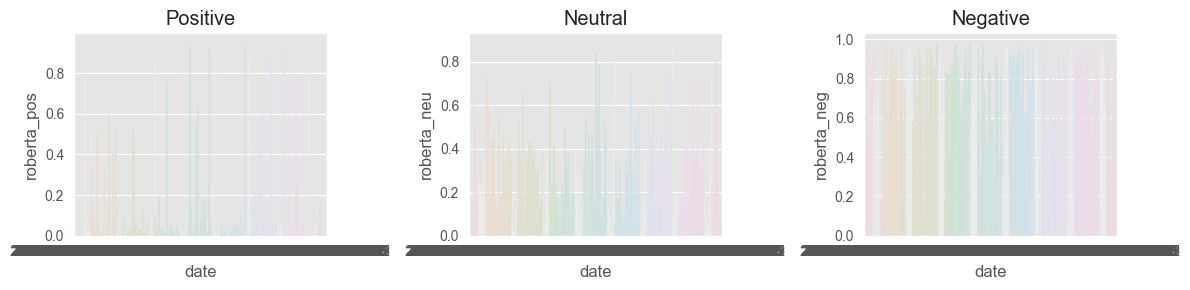

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaTitleDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaTitleDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [14]:
robertaContentDF = pd.DataFrame(robertaContent).T
robertaContentDF = robertaContentDF.reset_index().rename(columns={'index': 'ID'})
robertaContentDF = robertaContentDF.merge(df, on='ID', how='left')
robertaContentDF.columns

Index(['ID', 'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

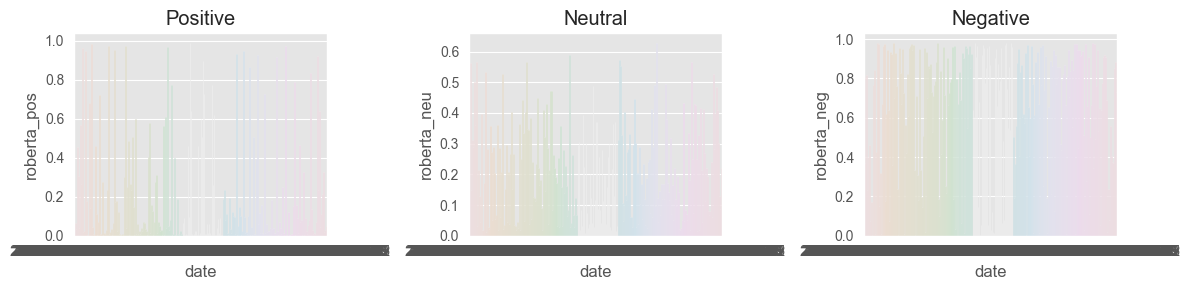

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=robertaContentDF, x='date', y='roberta_pos', ax=axs[0])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neu', ax=axs[1])
sns.barplot(data=robertaContentDF, x='date', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [16]:
results_title_df = pd.DataFrame(resTitle).T
results_title_df = results_title_df.reset_index().rename(columns={'index': 'ID'})
results_title_df = results_title_df.merge(df, on='ID', how='left')
results_title_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

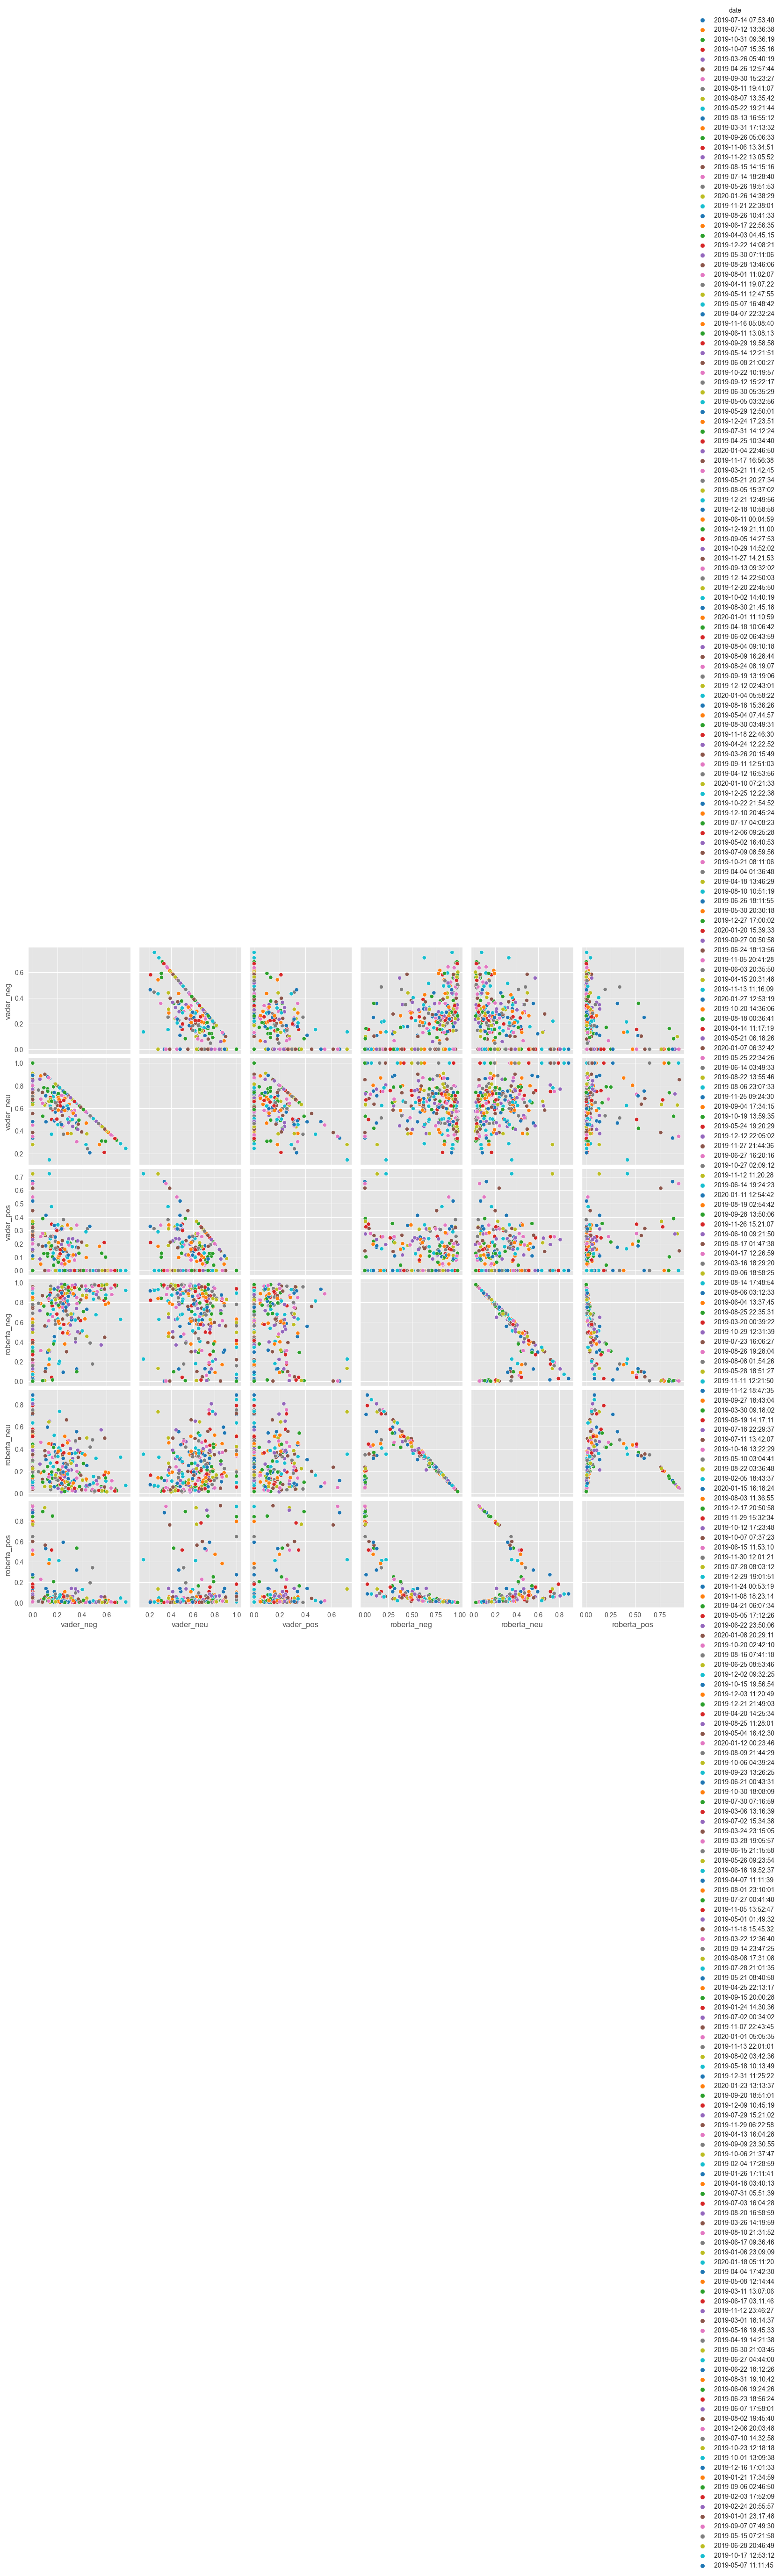

In [17]:
sns.pairplot(data=results_title_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()

In [18]:
results_content_df = pd.DataFrame(resContent).T
results_content_df = results_content_df.reset_index().rename(columns={'index': 'ID'})
results_content_df = results_content_df.merge(df, on='ID', how='left')
results_content_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'subReddit', 'Title',
       'Content', 'Top Comment', 'upvotes', 'Number of comments', 'date',
       'uniquePostID'],
      dtype='object')

In [ ]:
sns.pairplot(data=results_content_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='date',
            palette='tab10')
plt.show()